# Preproccesing

## Loading Data

* Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55)* have mixed types.<br>
Therefore it's Datypes are changed to *str* during construction. <br>
Nevertheless *tcp.srcport(34)*, *dns.qry.name.len(39)*, *mqtt.conack.flags(45)* are unsigned *integer* according to the Datasheet.

In [1]:
import pandas as pd
Rawdata = pd.read_csv("ML-EdgeIIot-dataset.csv", dtype={'arp.dst.proto_ipv4': str,
         'arp.src.proto_ipv4': str, 'http.file_data': str,'http.request.uri.query': str,
         'http.request.method': str, 'http.referer': str, 'http.request.full_uri': str,
         'http.request.version': str, 'tcp.options': str, 'tcp.payload': str, 'tcp.srcport': str,
         'dns.qry.name.len': str, 'mqtt.conack.flags': str, 'mqtt.msg': str, 
         'mqtt.protoname': str, 'mqtt.topic': str}) # , index_col=0)

Rawdata.tail()  # gives the last 5 rows of Data

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157799,2021 23:24:32.780376000,149.40.90.151,192.168.0.128,0,0.0,0.0,0,35144.0,45095.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


* The "frame.time" series of the Dataframe (Rawdata) has mixed values.(From *DDos_UDP_Attack* file the value *6.0*; From *MITM_attack* file a *IP-adrerss* instead of time; and *0.0*) <br>
Therefore all the values of invalid time format changes to *"Invalid"*<br>
The Problems might arise, if we exclude this Rows of *"Invalid"* because of downsampling.

In [2]:
def format_frame_time(row):
    try:
        return pd.to_datetime(row, errors="raise") #format='%y %H:%M:%S.%f'
    except ValueError:
        return "Invalid"
formated_frame_time = Rawdata["frame.time"].apply(format_frame_time)

print(formated_frame_time.iloc[6000])

C:\Users\haris\AppData\Local\Temp\ipykernel_13172\647846762.py:3: UserWarning: Parsing dates in  %Y %d:%m:%S.%f  format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(row, errors="raise") #format='%y %H:%M:%S.%f'


2021-01-01 22:58:35.383382


In [3]:
Rawdata.info() # To know each series/List's/Coulmn's dtype and gives the number of rows and columns
# 157800 entries, 63 Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  http.request.uri.query     15

No _Nan_ Values in Dataframe.

In [4]:
nans_indices = Rawdata.columns[Rawdata.isna().any()].tolist()
nans_indices

[]

In [5]:
# Displaying all unique values of series in Dataframes to eliminate the irrelevant series
for i in range(63):
    result = Rawdata.iloc[:,i].unique()
    print("< ",i," >:", result, end='\n')


<  0  >: ['6.0' '0.0' ' 2021 22:14:30.939803000 ' ... ' 2021 23:24:32.719931000 '
 ' 2021 23:24:32.752054000 ' ' 2021 23:24:32.780376000 ']
<  1  >: ['192.168.0.152' '192.168.0.101' '0' ... '107.155.221.49' '77.242.58.228'
 '149.40.90.151']
<  2  >: ['0.0' '192.168.0.128' '192.168.0.170' ... '26.223.146.121'
 '188.160.30.160' '126.188.47.126']
<  3  >: ['0.0' '0' '192.168.0.128' '192.168.0.170' '192.168.0.1' '192.168.0.101'
 '192.168.0.147' '192.168.0.129']
<  4  >: [0. 1. 2.]
<  5  >: [0. 6.]
<  6  >: ['0.0' '0' '192.168.0.170' '192.168.0.128' '192.168.0.101' '192.168.0.1'
 '0.0.0.0' '192.168.0.129']
<  7  >: [    0. 11938. 13986. ... 45657. 57686.  9555.]
<  8  >: [    0.   256.  8154. ... 40702. 41423. 42379.]
<  9  >: [       0. 76471910. 76496315. 76514613. 76531277. 76549573. 76557832.
 76568891. 76588882. 76595757. 76604517. 76615717. 76622289. 76628735.
 76634786. 76639254. 76723742. 76748730. 76754564. 76768120. 76774519.
 76781336. 76791709. 76796364. 76804905. 76810629. 7682

* Columns : 0,1,2,5,10,12,13,14,15,16,30,31,33,38,44,50,53,54,61 all have mixed Datatypes and cant be used for Model <br>
Therefore the 63 Columns will be truncated to 43 Columns

In [6]:
Columns_to_drop = [-1,0,1,2,5,10,12,13,14,15,16,30,31,33,38,44,50,53,54,61]
Columns_to_drop = [x+1 for x in Columns_to_drop] #frame.time will be removed and incidentally framed.time will be added
print(Columns_to_drop)
Df = Rawdata.drop(Rawdata.columns[Columns_to_drop], axis=1) # Relevant Dataframes are stored Df which will be further used
Df.info() # 157800 entries and 43 Columns +1 Frame.time

[0, 1, 2, 3, 6, 11, 13, 14, 15, 16, 17, 31, 32, 34, 39, 45, 51, 54, 55, 62]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   arp.opcode                 157800 non-null  float64
 1   arp.hw.size                157800 non-null  float64
 2   icmp.checksum              157800 non-null  float64
 3   icmp.seq_le                157800 non-null  float64
 4   icmp.transmit_timestamp    157800 non-null  float64
 5   icmp.unused                157800 non-null  float64
 6   http.content_length        157800 non-null  float64
 7   http.response              157800 non-null  float64
 8   http.tls_port              157800 non-null  float64
 9   tcp.ack                    157800 non-null  float64
 10  tcp.ack_raw                157800 non-null  float64
 11  tcp.checksum               157800 non-null  float64
 12  tcp.connec

In [7]:
# Displaying all unique values of series in extracted Dataframes
for i in range(43):
    result = Df.iloc[:,i].unique()
    print("< ",i," >:", result, end='\n')
# Column 5, 8, 26, 29, 34, 39, 40, 41 have only 0 as values.

<  0  >: [0. 1. 2.]
<  1  >: [0. 6.]
<  2  >: [    0. 11938. 13986. ... 45657. 57686.  9555.]
<  3  >: [    0.   256.  8154. ... 40702. 41423. 42379.]
<  4  >: [       0. 76471910. 76496315. 76514613. 76531277. 76549573. 76557832.
 76568891. 76588882. 76595757. 76604517. 76615717. 76622289. 76628735.
 76634786. 76639254. 76723742. 76748730. 76754564. 76768120. 76774519.
 76781336. 76791709. 76796364. 76804905. 76810629. 76826947. 76842965.
 76855950. 76861768. 76866670. 76872066. 76880226. 76884664. 76890335.
 76895665. 76900792. 76906673. 76922995. 76937158. 76943874. 76949606.
 76956221. 76961146. 76967443. 76975128. 76982622. 76988613. 76995182.
 77011519. 77020642. 77029661. 77035480. 77041589. 77050926. 77056580.
 77063273. 77070441. 77078849. 77096697. 77115472. 77125159. 77131332.
 77136069. 77148411. 77155260. 77160378. 77166527. 77171412. 77176050.
 77187148. 77200070. 77208262. 77214112. 77220906. 77230327. 77245077.
 77250122. 77257774. 77264171. 77268553. 77274626. 77284157

* The following Series of the Dataframe(Df) hold the value *0.0* and nothing else. <br>
Therefore this series/columns are also truncated 

In [8]:
Df.iloc[:,[5, 8, 26, 29, 34, 39, 40, 41]].describe() 

,icmp.unused,http.tls_port,dns.qry.type,dns.retransmit_request_in,mqtt.msg_decoded_as,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id
count,157800.0,157800.0,157800.0,157800.0,157800.0,157800.0,157800.0,157800.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
Columns_to_drop = [5, 8, 26, 29, 34, 39, 40, 41]
Dataset = Df.drop(Df.columns[Columns_to_drop], axis=1) # Dataframes without 0 are stored Dataset which will be further used
Dataset.info() # 157800 entries and 36 Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   arp.opcode               157800 non-null  float64
 1   arp.hw.size              157800 non-null  float64
 2   icmp.checksum            157800 non-null  float64
 3   icmp.seq_le              157800 non-null  float64
 4   icmp.transmit_timestamp  157800 non-null  float64
 5   http.content_length      157800 non-null  float64
 6   http.response            157800 non-null  float64
 7   tcp.ack                  157800 non-null  float64
 8   tcp.ack_raw              157800 non-null  float64
 9   tcp.checksum             157800 non-null  float64
 10  tcp.connection.fin       157800 non-null  float64
 11  tcp.connection.rst       157800 non-null  float64
 12  tcp.connection.syn       157800 non-null  float64
 13  tcp.connection.synack    157800 non-null  float64
 14  tcp.

In [10]:
# checking if all the values of the series has acceptable values
list = [i for i in range(35)]
print(list)
Dataset.iloc[:,list].describe()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,...,dns.retransmit_request,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,Attack_label
count,157800.000000,157800.000000,157800.000000,157800.000000,1.578000e+05,157800.000000,157800.000000,1.578000e+05,1.578000e+05,157800.000000,...,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000
mean,0.014195,0.059848,3047.291838,3239.979778,4.046816e+04,14.715520,0.045748,7.160039e+07,1.358347e+09,25796.599163,...,0.000006,0.007921,0.015843,2.581293,0.419341,0.161331,0.031686,0.189506,0.031686,0.846001
std,0.149783,0.596245,11144.328203,11406.072994,1.764075e+06,229.659671,0.208938,3.101231e+08,1.295523e+09,21513.031052,...,0.002517,0.088649,0.177299,20.695242,3.606594,1.293453,0.354598,2.124206,0.354598,0.360949
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,2982.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,1.160051e+09,23906.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.790000e+02,2.372228e+09,44733.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.000000,6.000000,65532.000000,65524.000000,7.728902e+07,83655.000000,1.000000,2.147333e+09,4.294947e+09,65535.000000,...,1.000000,1.000000,2.000000,224.000000,39.000000,14.000000,4.000000,24.000000,4.000000,1.000000


In [11]:
Dataset.insert(0, "formated.time", formated_frame_time) 


In [12]:
Dataset.head()

,formated.time,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,...,dns.retransmit_request,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,Attack_label
0,Invalid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,Invalid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Invalid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Invalid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Invalid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


* Now the Index(frame.time) have *"Invalid"* as value, where values other than datetime format were.<br>
We could truncate the whole row, where this *Invalid* as values are.

In [13]:
Dataset_ds = Dataset.loc[Dataset["formated.time"] != "Invalid"] # downsampled Dataset 
Dataset_ds.head()

,formated.time,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,...,dns.retransmit_request,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,Attack_label
1214,2021-01-01 22:14:30.939803,0.0,0.0,11938.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1215,2021-01-01 22:14:30.939896,0.0,0.0,13986.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1216,2021-01-01 22:14:31.371846,0.0,0.0,1418.0,256.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1217,2021-01-01 22:14:31.371927,0.0,0.0,3466.0,256.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1218,2021-01-01 22:14:31.910480,0.0,0.0,54250.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


* Indexing *"formated.time"*.

In [14]:
Dataset_ds= Dataset_ds.set_index("formated.time")
Dataset_ds.head()

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,...,dns.retransmit_request,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,Attack_label
formated.time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 22:14:30.939803,0.0,0.0,11938.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2021-01-01 22:14:30.939896,0.0,0.0,13986.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2021-01-01 22:14:31.371846,0.0,0.0,1418.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2021-01-01 22:14:31.371927,0.0,0.0,3466.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2021-01-01 22:14:31.910480,0.0,0.0,54250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [15]:
Dataset_ds.info() # 142095 Entries ;35 Columns ; Index = formated.time

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142095 entries, 2021-01-01 22:14:30.939803 to 2021-01-01 23:24:32.780376
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   arp.opcode               142095 non-null  float64
 1   arp.hw.size              142095 non-null  float64
 2   icmp.checksum            142095 non-null  float64
 3   icmp.seq_le              142095 non-null  float64
 4   icmp.transmit_timestamp  142095 non-null  float64
 5   http.content_length      142095 non-null  float64
 6   http.response            142095 non-null  float64
 7   tcp.ack                  142095 non-null  float64
 8   tcp.ack_raw              142095 non-null  float64
 9   tcp.checksum             142095 non-null  float64
 10  tcp.connection.fin       142095 non-null  float64
 11  tcp.connection.rst       142095 non-null  float64
 12  tcp.connection.syn       142095 non-null  float64
 13  tcp.connect

* Storing the Variable *Dataset_ds* in pickle file to use in another notebook.

In [59]:
import pickle
with  open('session_state.pkl', 'wb') as file:
    pickle.dump(Dataset_ds, file)

***

## Visualising

In [18]:
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns
import numpy as np

In [47]:
Column_list = [i for i in range(10)]
Dataset_ds.iloc[:,Column_list].describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum
count,142095.000000,142095.000000,142095.000000,142095.000000,1.420950e+05,142095.000000,142095.000000,1.420950e+05,1.420950e+05,142095.000000
mean,0.015764,0.066463,3384.092699,3275.321194,4.494089e+04,16.341947,0.050804,7.951399e+07,1.508478e+09,28647.759232
std,0.157765,0.627982,11695.430702,11465.669030,1.858954e+06,241.963820,0.219598,3.258481e+08,1.279614e+09,20791.414373
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,1.672418e+08,9227.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,6.000000e+00,1.432766e+09,28104.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,7.030000e+02,2.399180e+09,46786.000000
max,2.000000,6.000000,65532.000000,65517.000000,7.728902e+07,83655.000000,1.000000,2.147333e+09,4.294947e+09,65535.000000


c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


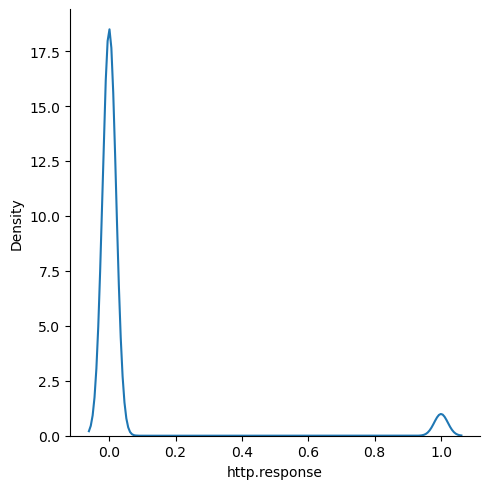

In [48]:

Column_list = Dataset_ds.columns
t = lambda a : Column_list[a]
#Column_list = Column_list[1:3]
sns.displot(data=Dataset_ds, x = t(6), kind = "kde")


array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'

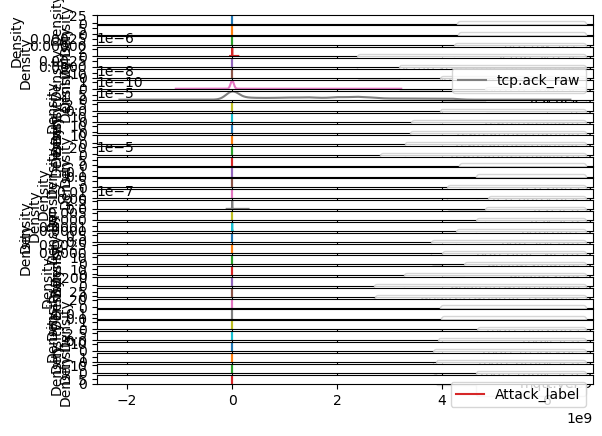

In [57]:
Dataset_ds.plot(x= Column_list[2], kind='density', subplots=True)

***

* Dataset is copied to *Data_copy* Variable.

In [32]:
Data_copy = Dataset_ds.copy()

* *Data_copy* is min-max normalised. i.e. all Datavalues will be in the range of 0 to 1.

In [40]:
for column in Data_copy.columns: 
    if((Data_copy[column].max() - Data_copy[column].min()) == 0):
        Data_copy[column] = (Data_copy[column] - Data_copy[column].min())
    else:
        Data_copy[column] = (Data_copy[column] - Data_copy[column].min()) / (Data_copy[column].max() - Data_copy[column].min())

In [46]:
Column_list = [i for i in range(10)]
Data_copy.iloc[:,Column_list].describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum
count,142095.000000,142095.000000,142095.000000,142095.000000,142095.000000,142095.000000,142095.000000,1.420950e+05,142095.000000,142095.000000
mean,0.007882,0.011077,0.051640,0.049992,0.000581,0.000195,0.050804,3.702918e-02,0.351222,0.437137
std,0.078882,0.104664,0.178469,0.175003,0.024052,0.002892,0.219598,1.517455e-01,0.297935,0.317257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.656939e-10,0.038939,0.140795
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.794163e-09,0.333593,0.428840
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.273828e-07,0.558605,0.713909
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000


In [41]:
Data_copy.tail() # min max normalised

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,...,dns.retransmit_request,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,Attack_label
formated.time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 23:24:32.698981,0.0,0.0,0.743591,0.621060,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-01-01 23:24:32.699354,0.0,0.0,0.696713,0.621243,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-01-01 23:24:32.719931,0.0,0.0,0.880272,0.632248,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-01-01 23:24:32.752054,0.0,0.0,0.145807,0.646840,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-01-01 23:24:32.780376,0.0,0.0,0.536288,0.688295,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
Data_vis = Data_copy.iloc[:,0:33]
Data_vis = Data_vis.reset_index(drop=True, inplace=False)
Data_vis.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,...,dns.qry.qu,dns.retransmission,dns.retransmit_request,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len
0,0.0,0.0,0.182171,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.213422,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.021638,0.003907,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.052890,0.003907,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.827840,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Distribution plot

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


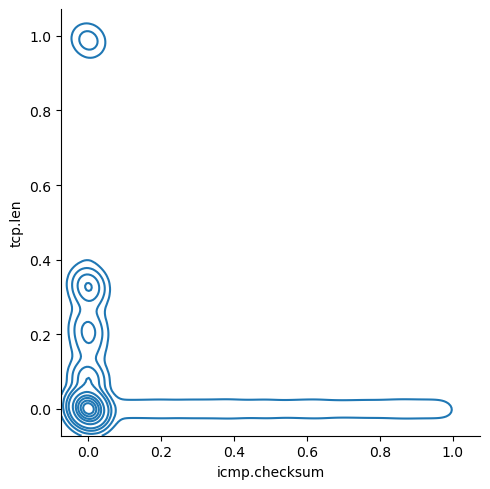

In [25]:
sns.displot(data=Data_vis, x ="icmp.checksum", y="tcp.len", kind = "kde")


c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

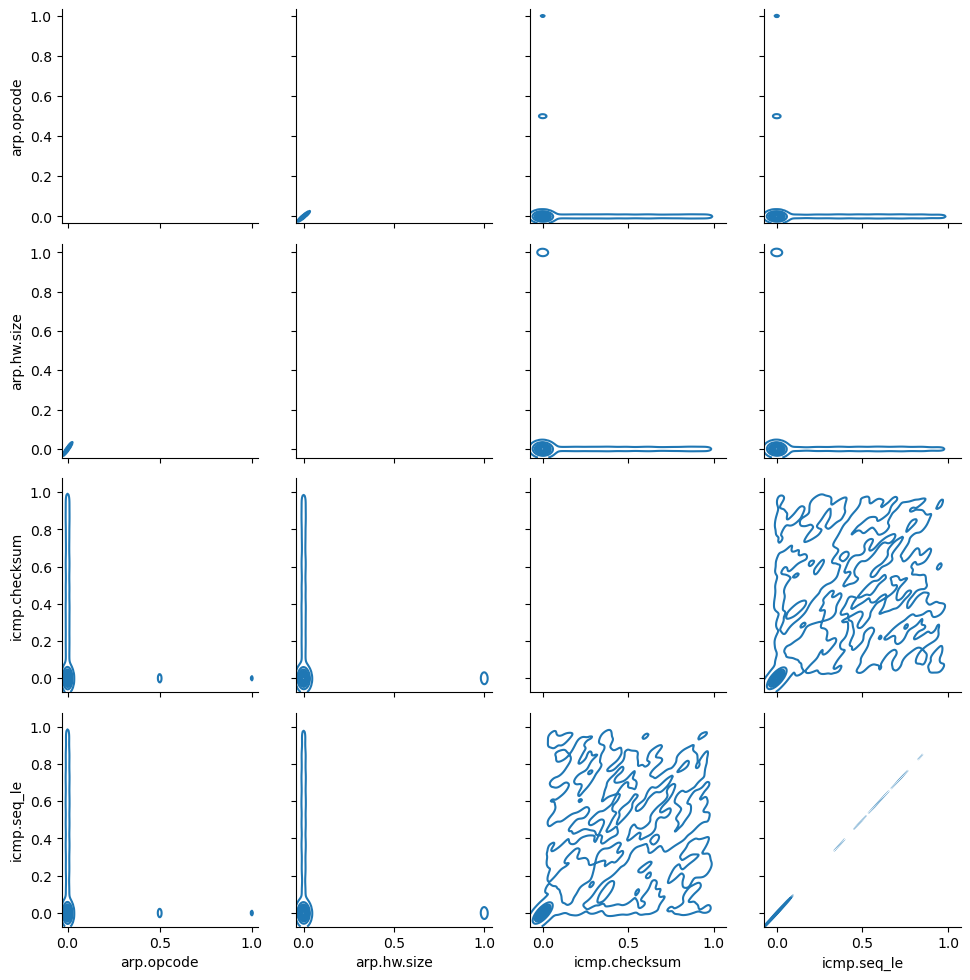

In [30]:
grid = sns.PairGrid(Data_vis.iloc[:,0:4])
grid.map(sns.kdeplot)


* Histmap explains the datavalue distribution in each Columns.

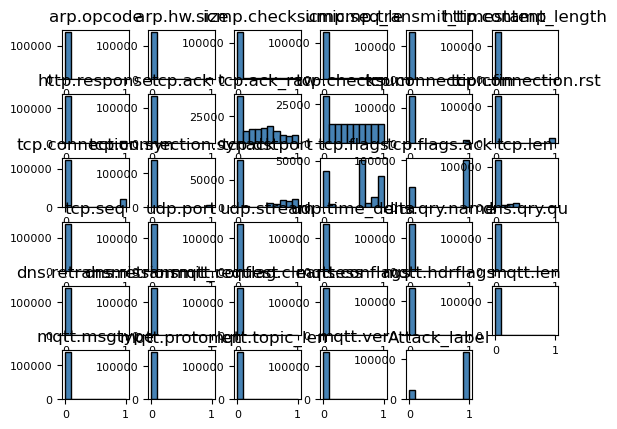

<Figure size 2000x1200 with 0 Axes>

In [48]:
Data_copy.hist(color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)  
hist_fig = plot.figure(figsize=(20,12))  
plot.tight_layout(rect=(0, 0, 8, 8))  

* Relationship Plot <br>
To explain the correlation between each Series/columns of Data a Heatmap is created.

In [37]:
corr_Data = Data_copy.corr(method="pearson") # the corr methods are ‘pearson’, ‘kendall’, ‘spearman’
corr_Data

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,...,dns.retransmit_request,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,Attack_label
arp.opcode,1.000000,0.944123,-0.028913,-0.028544,-0.002416,-0.006749,-0.023117,-0.024383,-0.117794,-0.137679,...,-0.000265,-0.009413,-0.009413,-0.013145,-0.012252,-0.013145,-0.009413,-0.009398,-0.009413,0.039935
arp.hw.size,0.944123,1.000000,-0.030624,-0.030233,-0.002559,-0.007148,-0.024485,-0.025826,-0.124765,-0.145828,...,-0.000281,-0.009970,-0.009970,-0.013923,-0.012978,-0.013923,-0.009970,-0.009954,-0.009970,0.040571
icmp.checksum,-0.028913,-0.030624,1.000000,0.716962,0.055884,-0.019543,-0.066942,-0.070609,-0.341106,-0.398690,...,-0.000768,-0.027259,-0.027259,-0.038066,-0.035480,-0.038066,-0.027259,-0.027215,-0.027259,0.131425
icmp.seq_le,-0.028544,-0.030233,0.716962,1.000000,-0.006906,-0.019293,-0.066089,-0.069709,-0.336758,-0.393608,...,-0.000758,-0.026912,-0.026912,-0.037580,-0.035028,-0.037580,-0.026912,-0.026868,-0.026912,0.129750
icmp.transmit_timestamp,-0.002416,-0.002559,0.055884,-0.006906,1.000000,-0.001633,-0.005593,-0.005899,-0.028499,-0.033311,...,-0.000064,-0.002278,-0.002278,-0.003180,-0.002964,-0.003180,-0.002278,-0.002274,-0.002278,0.010981
http.content_length,-0.006749,-0.007148,-0.019543,-0.019293,-0.001633,1.000000,0.266713,-0.016479,0.034912,0.013759,...,-0.000179,-0.006363,-0.006363,-0.008885,-0.008282,-0.008885,-0.006363,-0.006352,-0.006363,0.030676
http.response,-0.023117,-0.024485,-0.066942,-0.066089,-0.005593,0.266713,1.000000,-0.056449,0.125243,0.049046,...,-0.000614,-0.021795,-0.021795,-0.030435,-0.028368,-0.030435,-0.021795,-0.021760,-0.021795,0.105080
tcp.ack,-0.024383,-0.025826,-0.070609,-0.069709,-0.005899,-0.016479,-0.056449,1.000000,-0.015022,0.051906,...,-0.000647,-0.022989,-0.022989,-0.032102,-0.029922,-0.032102,-0.022989,-0.022952,-0.022989,0.103394
tcp.ack_raw,-0.117794,-0.124765,-0.341106,-0.336758,-0.028499,0.034912,0.125243,-0.015022,1.000000,0.238131,...,-0.003127,0.050724,0.050724,0.063142,0.057275,0.063142,0.050724,0.041823,0.050724,-0.101385
tcp.checksum,-0.137679,-0.145828,-0.398690,-0.393608,-0.033311,0.013759,0.049046,0.051906,0.238131,1.000000,...,-0.003655,0.020167,0.020167,0.025664,0.024145,0.025664,0.020167,0.018059,0.020167,-0.084197


<Axes: >

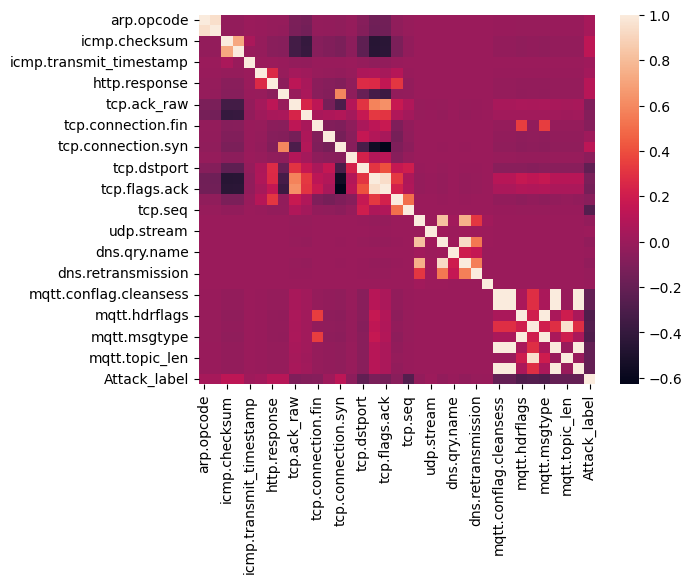

In [38]:
# Heatmap
sns.heatmap(corr_Data, annot=False)

***

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [54]:
Data_copy2 = Dataset_ds.copy()
Columns_list = Data_copy2.columns.to_list()

In [58]:
Data_array = Data_copy2.to_numpy()


In [59]:
scaler = preprocessing.StandardScaler().fit(Data_array)
Data_scaled = scaler.transform(Data_array)